<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🟢**Note:** In Transfer Learning we use pre trained model and train it for new problem. This pre trained model is trained for large amount of images. So, we can modify it for most of the problems by train this model more for that kind of images

Here we will use MobileNet V2 pretrained model and train it for Flowers Data set which we use in Data Augmentation Topic

**Link for labels**
https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt


**Link for Model**
https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4


In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE=(224,224)
classifier=tf.keras.Sequential(
    [
        hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
    ]
)

In [5]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

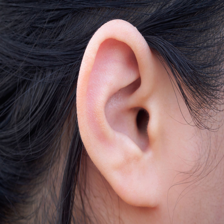

In [6]:
#above I imported model from tensorflow (i randomly pich the image from browser to check the model accuracy)
ear=Image.open("ear.jpg").resize(IMAGE_SHAPE)
ear

In [7]:
#Normalizing this ear picture
ear_norm=np.array(ear)/255
ear_norm.shape

(224, 224, 3)

In [8]:
#Adding one more dimension
ear_norm[np.newaxis,...].shape

(1, 224, 224, 3)

In [9]:
result=classifier.predict(ear_norm[np.newaxis,...])
result.shape

1/1 [==============================] - 8s 8s/step


(1, 1001)

In [10]:
result

array([[-0.05783042, -0.9587873 , -0.27823064, ..., -0.00279704,
         0.7121231 , -1.3609371 ]], dtype=float32)

In [11]:
predicted_label_index=np.argmax(result)
predicted_label_index

585

In [12]:
f = open("/content/ImageNetLabels.txt", "r", encoding="UTF8").readlines()

In [13]:
f[585] #yes this answer is true but we were need ear prediction hahahaha

'hair slide\n'

In [14]:
#Another way to read the text file
image_labels=[]
with open("ImageNetLabels.txt","r") as f:
  image_labels=f.read().splitlines()

In [15]:
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [16]:
image_labels[predicted_label_index]

'hair slide'

##Let's start Testing the pretrained model



In [17]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#here we have zip files so we have to convert the zip file into images folder
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [18]:
data_dir

'./datasets/flower_photos'

In [19]:
import pathlib #to convert these paths for windows or enviroment specific
data_dir=pathlib.Path(data_dir)

In [20]:
data_dir

PosixPath('datasets/flower_photos')

In [21]:
list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/daisy/5110107234_12ddc0206b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5981645737_29eceac291_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2590291468_2635d3e4e0_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/20703737132_179560d0fb.jpg'),
 PosixPath('datasets/flower_photos/daisy/176375506_201859bb92_m.jpg')]

In [22]:
#to count the images we will use
image_count=len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [23]:
#to get the roses data we will use these lines
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2093263381_afd51358a3.jpg'),
 PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4396642388_3081a38875_n.jpg')]

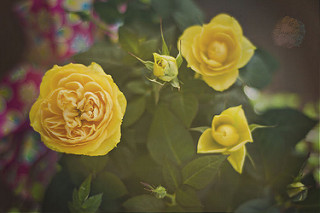

In [24]:
#let's check the images
Image.open(str(roses[1]))

In [25]:
tulips=list(data_dir.glob("tulips/*"))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/3502251824_3be758edc6_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/4546299243_23cd58eb43.jpg'),
 PosixPath('datasets/flower_photos/tulips/4955884820_7e4ce4d7e5_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/471298577_cc7558bcf1.jpg'),
 PosixPath('datasets/flower_photos/tulips/17224410762_402455ed8f.jpg')]

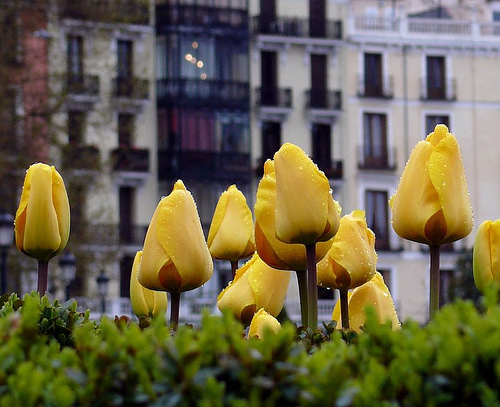

In [26]:
Image.open(str(tulips[3]))

In [27]:
flowers_images_dic={
    'roses':list(data_dir.glob("roses/*")),
    'daisy':list(data_dir.glob("daisy/*")),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob("sunflowers/*")),
    'tulips':list(data_dir.glob("tulips/*"))
}

In [28]:
flowers_images_dic['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5529341024_0c35f2657d.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2093263381_afd51358a3.jpg'),
 PosixPath('datasets/flower_photos/roses/9300754115_dd79670066_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4396642388_3081a38875_n.jpg')]

In [29]:
flowers_images_dic['daisy'][:5]

[PosixPath('datasets/flower_photos/daisy/5110107234_12ddc0206b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5981645737_29eceac291_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2590291468_2635d3e4e0_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/20703737132_179560d0fb.jpg'),
 PosixPath('datasets/flower_photos/daisy/176375506_201859bb92_m.jpg')]

In [30]:
#creating label directory
flowers_labels_dic={
     'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [31]:
flowers_labels_dic

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [32]:
#lets read the image using opencv
img=cv2.imread(str(flowers_images_dic["roses"][0]))

In [33]:
img.shape

(333, 500, 3)

In [34]:
#every image size is different so resize them for the model
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [35]:
#Now let's make dataset by reading images by thier path
X,y=[],[]
for flower_name,images in flowers_images_dic.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_image=cv2.resize(img,(IMAGE_SHAPE))
    X.append(resized_image)
    y.append(flowers_labels_dic[flower_name])

In [36]:
X[0].shape

(224, 224, 3)

In [37]:
#Now you have to normalize the whole data before this you have to convert the array into numpy
X=np.array(X)
y=np.array(y)

In [38]:
#splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [39]:
X_train.shape

(2752, 224, 224, 3)

In [40]:
X_test.shape

(918, 224, 224, 3)

In [41]:
#Now normalize these images
X_train_norm=X_train/255
X_test_norm=X_test/255

0

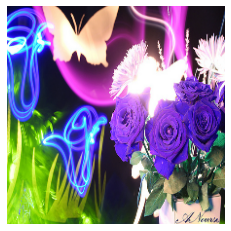

In [42]:
plt.axis("off")
plt.imshow(X[0])
y[0]

0

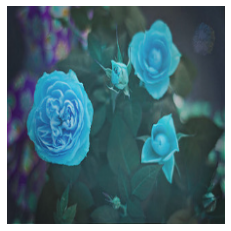

In [43]:
plt.axis("off")
plt.imshow(X[1])
y[1]

0

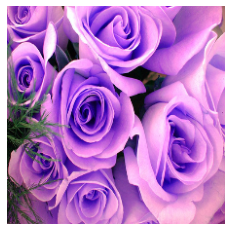

In [44]:
plt.axis("off")
plt.imshow(X[2])
y[2]

In [45]:
#Now check the prediction of the model
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 1s 758ms/step


array([795, 795, 795])

In [46]:
image_labels[predicted[0]],image_labels[predicted[1]],image_labels[predicted[2]]

('shower curtain', 'shower curtain', 'shower curtain')

###Let's Make able to predict to pre trained model

In [47]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model,input_shape=IMAGE_SHAPE+(3,),trainable=False
)

In [48]:
#let's create the model after freezing layers
num_of_flowers=5
model=tf.keras.Sequential(
    [
        pretrained_model_without_top_layer,#previous layers are already trained
        tf.keras.layers.Dense(num_of_flowers)#trainning last layer
    ]
)
# model.summary()

In [49]:
#compiling model now
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(X_train_norm,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 7s 40ms/step - loss: 0.8574 - acc: 0.6773
Epoch 2/5
86/86 [==============================] - 3s 40ms/step - loss: 0.4255 - acc: 0.8514
Epoch 3/5
86/86 [==============================] - 3s 40ms/step - loss: 0.3265 - acc: 0.8939
Epoch 4/5
86/86 [==============================] - 3s 41ms/step - loss: 0.2746 - acc: 0.9088
Epoch 5/5
86/86 [==============================] - 3s 40ms/step - loss: 0.2375 - acc: 0.9302


In [50]:
model.evaluate(X_test_norm,y_test)

29/29 [==============================] - 2s 54ms/step - loss: 0.3403 - acc: 0.8704


[0.34030866622924805, 0.8703703880310059]